# Random Forest - Regression

* [1) Linear Regression](#linear)

* [2) Polynomial Regression](#poly)

### Advanced Models
* [3) KNN Regression](#knn)
* [4) Decision Tree Regression](#tree)
* [5) Support Vector Regression](#svm)
* [6) Random Forest Regression](#forest)
* [7) Gradient Boosting](#gradient)
* [8) Adaboost](#ada)

## The Data

We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

<img src='boring.jpg' height=400>

They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density, the researchers are unsure why this is.

**The project is to build a generalized model, which could use to accept a rebound signal, and output an expected rock density.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


## rename the columns

In [5]:
df.columns=['Signal','Density']

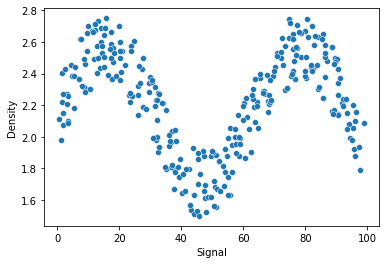

In [6]:
sns.scatterplot(data=df, x='Signal', y='Density');

------

## Splitting the Data

In [18]:
X =  df['Signal'].values.reshape(-1,1)  # as we only have single feature, we need to reshape the value =>  turn to numpy array => reshape it
y = df['Density']

In [13]:
X[:5] # before reshape

0    72.945124
1    14.229877
2    36.597334
3     9.578899
4    21.765897
Name: Signal, dtype: float64

In [16]:
X[:5] # after reshape

array([[72.94512436],
       [14.2298772 ],
       [36.59733361],
       [ 9.57889939],
       [21.76589708]])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# <a name='linear'>1) Linear Regression</a>

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr_model = LinearRegression()

In [23]:
lr_model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [24]:
lr_preds = lr_model.predict(X_test)

In [26]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [29]:
mean_squared_error(y_test, lr_preds)

0.06605167265148641

In [31]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.25700519965846297

In [32]:
# check the mean value of Density
df['Density'].mean()

2.225062949323796

In [33]:
100 * 0.211198973318633 / 2.225062949323796

9.491820147507156

So our model is off by abount 9.5% of the actual value based on MAE.

It seems like our model is performing not too bad. However, if we look closer to the value of predictions, the predicted values are very similar around (2... something). This indicates something is happening.

But, what does it looks like? We can make some predictions on new data to test out whether our assumption is correct or not.

## Predictions on new data and Visualization

In [36]:
signal_range = np.arange(0, 100)

In [39]:
signal_preds = lr_model.predict(signal_range.reshape(-1, 1))

We can compare the acutal shape of the data and Prediction of our model's shape.

**Our model is NOT even picking up the similar shape at all. All predictions are around 2.2 and looks like a line**

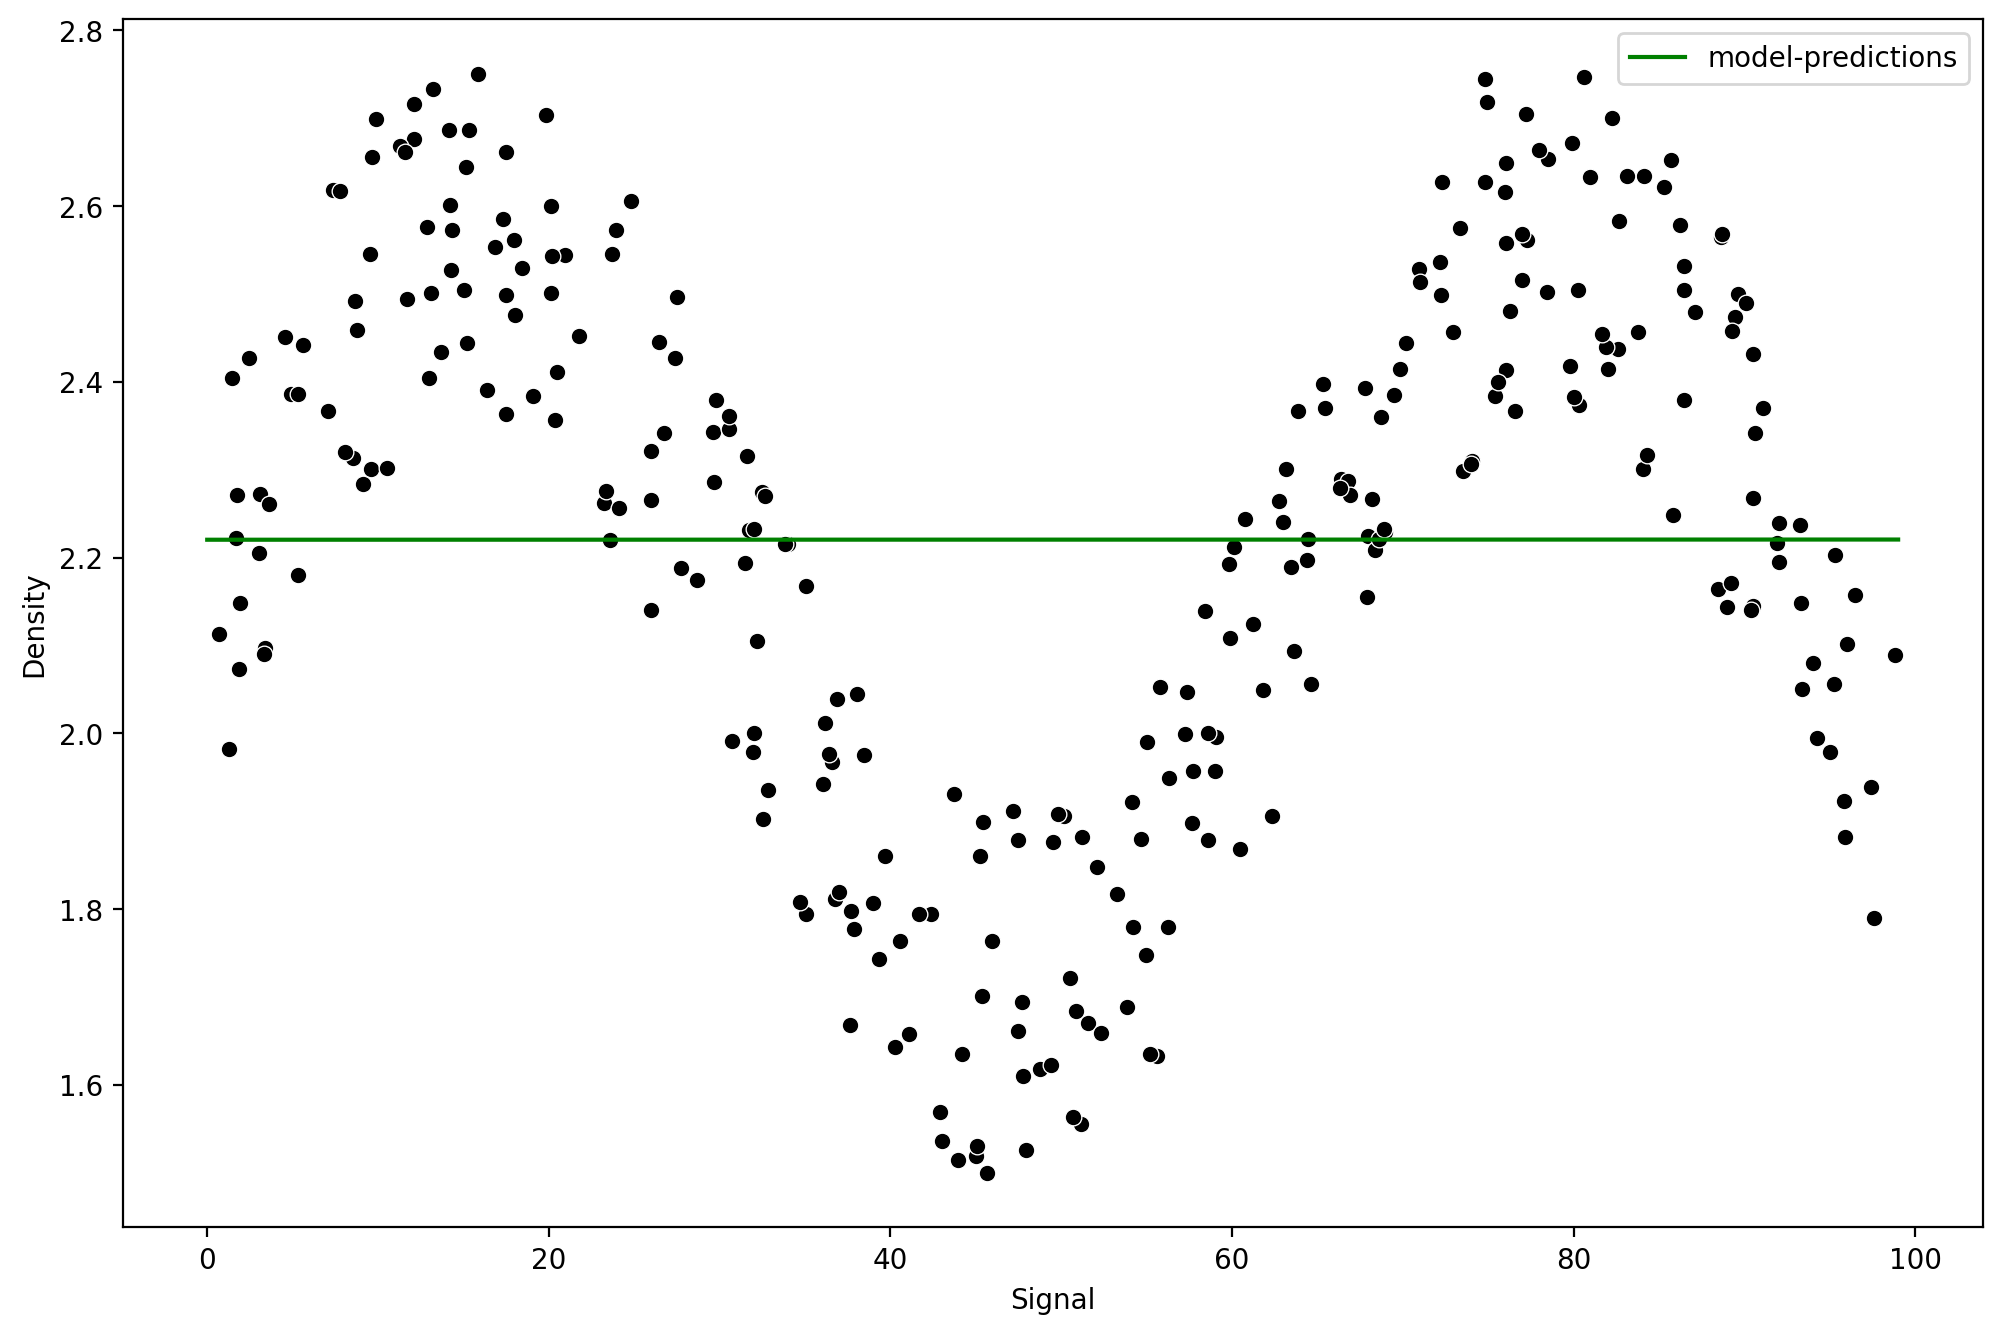

In [48]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(data=df, x='Signal', y='Density',color='black');

# what is my acutal model looks like for new singal range
plt.plot(signal_range, signal_preds, color='green', label='model-predictions');
plt.legend();

## Summary:

So our linear model is not working well enough, we need to explore more models.
* We need to look for any similarity of prediction values.
* Performance metrics like MAE is not enough
* Visulalization is important and helpuful. We need to visualize the predictions against true values.


--------------
------------

# <a name='poly'>2) Polynomial Regression</a>

--------

# Advanced Models

# <a name='knn'>3) KNN Regression</a>
# <a name='tree'>4) Decision Tree Regression</a>
# <a name='svm'>5) Support Vector Regression</a>
# <a name='forest'>6) Random Forest Regression</a>
# <a name='gradient'>7) Gradient Boosting</a>
# <a name='ada'>8) Adaboost</a>